In [241]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import simpleaudio as sa
except:
    %pip install simpleaudio
    import simpleaudio as sa

import time

In [255]:
def wave(freq=440, samples_sec=44100, seconds=1):
    '''
    Takes in 
        a freqency (int/float), freq
        a number of samples per seconds, samples_sec
        a number of seconds, seconds
    Returns a sin wave as an np.array
    '''
    # Generate array with seconds*sample_rate steps, ranging between 0 and seconds
    t = np.linspace(0, seconds, seconds * samples_sec, False)
    return np.sin(freq * 2 * np.pi * t)


def gen_audio(note):
    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    # Convert to 16-bit data
    audio = audio.astype(np.int16)

    return sa.WaveObject(audio) 

def gen_buffer(note):
    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    # Convert to 16-bit data
    audio = audio.astype(np.int16)

    return audio 


def play(sound, wait=True):
    # Start playback
    play_obj = sa.play_buffer(gen_buffer(sound), 1, 2, 44100)

    # Wait for playback to finish before exiting
    if wait:
        play_obj.wait_done()

<Figure size 720x576 with 0 Axes>

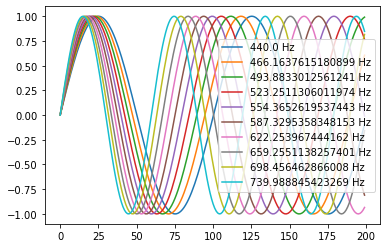

<Figure size 720x576 with 0 Axes>

In [268]:
num_frequs = 10
freqs = 440 * np.power(np.repeat(pow(2, 1/12), num_frequs), np.arange(0,num_frequs,1))
sounds = [wave(f) for f in freqs]
for i,s in enumerate(sounds):
    plt.plot(s[:200], label=str(freqs[i])+" Hz")
    play(s)
plt.legend()
plt.figure(figsize=(10,8))

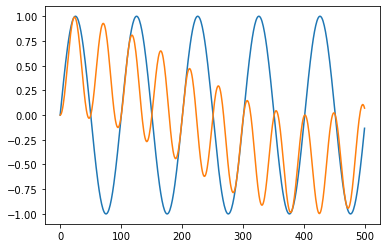

In [299]:
tests = [
    sounds[0],
    sounds[0] * sounds[2],
    ]
for s in tests:
    plt.plot((s)[:500])
    play(s)

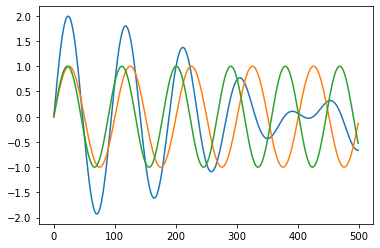

In [300]:
tests = [
    sounds[0] + sounds[2],
    sounds[0],
    sounds[2]
    ]
for s in tests:
    plt.plot((s)[:500])
    play(s)
    

In [287]:
notes = [gen_audio(s) for s in sounds]
for i in [0,4]:
    notes[i].play()
